## Observations and Insights

## Dependencies and starter code

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
full_df = pd.merge(mouse_metadata, study_results, on = ['Mouse ID','Mouse ID'], how="left")
full_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_vol = pd.DataFrame(round(full_df.groupby(["Drug Regimen"]).mean()['Tumor Volume (mm3)'],2))
mean_vol = mean_vol.rename(columns={"Tumor Volume (mm3)": "Mean",})

median = pd.DataFrame(round(full_df.groupby(["Drug Regimen"]).median()['Tumor Volume (mm3)'],2))
median = median.rename(columns={"Tumor Volume (mm3)": "Median",})

variance = pd.DataFrame(round(full_df.groupby(["Drug Regimen"]).var()['Tumor Volume (mm3)'],2))
variance = variance.rename(columns={"Tumor Volume (mm3)": "Variance"})

sd = pd.DataFrame(round(full_df.groupby(["Drug Regimen"]).std()['Tumor Volume (mm3)'],2))
sd = sd.rename(columns={"Tumor Volume (mm3)": "StDev"})

SEM= pd.DataFrame(round(full_df.groupby(["Drug Regimen"]).sem()['Tumor Volume (mm3)'],2))
SEM = SEM.rename(columns={"Tumor Volume (mm3)": "SEM"})

# merge the DataFrames https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
results = [mean_vol, median, variance, sd, SEM]
results = pd.concat(results, axis = 1, join = 'inner')
results

,Mean,Median,Variance,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

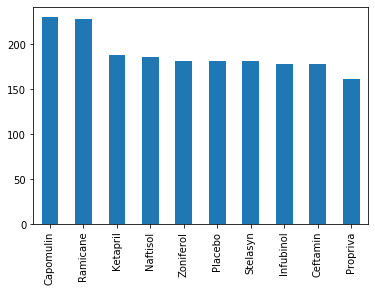

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
treatment = full_df["Drug Regimen"].value_counts()
treatment.plot(kind="bar")



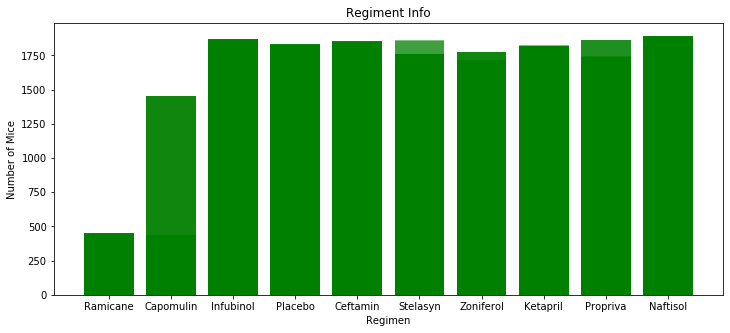

In [56]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(full_df))

plt.figure(figsize = (12,5))
plt.bar(full_df["Drug Regimen"], x_axis, color="g", alpha =.5, align = "center")
plt.title("Regiment Info")
plt.xlabel("Regimen")
plt.ylabel("Number of Mice")
plt.show()



## Pie plots

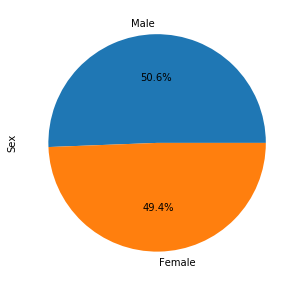

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = full_df["Sex"].value_counts()
gender_graph = gender.plot(kind = "pie", y="count", figsize=(5,5), autopct = "%1.1f%%")

([<matplotlib.patches.Wedge at 0x12e29a10>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.022900912879184488, -1.1997814585120492, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.013358865846190952, -0.699872517465362, '49.4%')])

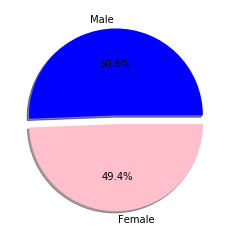

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0,.1)
colors = ["blue", "pink"]
labels = ["Male", "Female"]
plt.pie(gender, explode = explode, colors = colors, autopct="%1.1f%%", labels = labels, shadow = True) 


([<matplotlib.patches.Wedge at 0x12e77a50>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.022900912879184488, -1.1997814585120492, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.013358865846190952, -0.699872517465362, '49.4%')])

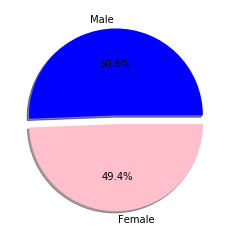

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0,.1)
colors = ["blue", "pink"]
labels = ["Male", "Female"]
plt.pie(gender, explode = explode, colors = colors, autopct="%1.1f%%", labels = labels, shadow = True) 


## Quartiles, outliers and boxplots

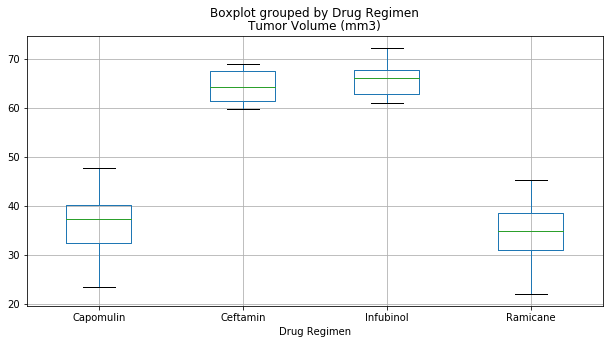

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.


drug_treat = full_df[(full_df["Drug Regimen"] == 'Capomulin') |
                      (full_df["Drug Regimen"] == 'Infubinol') |
                      (full_df["Drug Regimen"] == 'Ramicane') |
                      (full_df["Drug Regimen"] == 'Ceftamin')]
drug_treat = drug_treat[drug_treat["Timepoint"] == 45][["Drug Regimen","Tumor Volume (mm3)"]]

drug_treat.boxplot('Tumor Volume (mm3)', by='Drug Regimen', figsize=(10,5))




In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume')

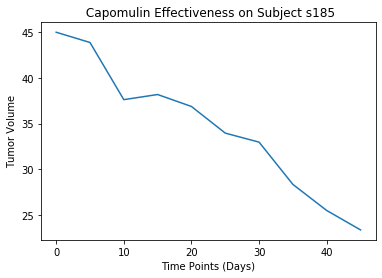

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capom = full_df[(full_df["Drug Regimen"] == 'Capomulin')]
capom = full_df[(full_df["Mouse ID"] == "s185")]

capom

x_axis = capom["Timepoint"]
y_axis = capom["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)

plt.title(" Capomulin Effectiveness on Subject s185")
plt.xlabel("Time Points (Days)")
plt.ylabel("Tumor Volume")

Text(0, 0.5, 'Tumor Volume')

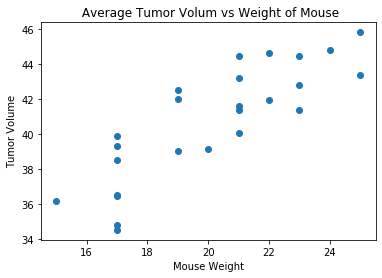

In [52]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capom = full_df[(full_df["Drug Regimen"] == 'Capomulin')]
mean_weight = capom.groupby(capom["Mouse ID"])["Weight (g)"].mean()
mean_tumor = capom.groupby(capom["Mouse ID"])["Tumor Volume (mm3)"].mean()
x_axis = mean_weight
y_axis = mean_tumor
plt.scatter(x_axis, y_axis)

plt.title(" Average Tumor Volum vs Weight of Mouse")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")

Text(0, 0.5, 'Tumor Volume')

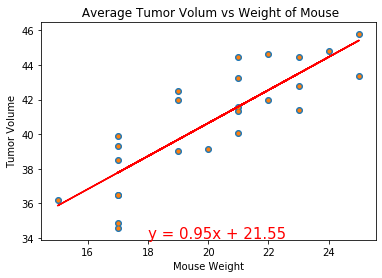

In [51]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_value = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(mean_weight,mean_tumor)
plt.scatter(x_axis, y_axis, marker='o', s=10)

plt.plot(x_axis, regress_value, "r-")
plt.annotate(line_eq,(18,34), fontsize=15, color="red")

plt.title(" Average Tumor Volum vs Weight of Mouse")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")